# Introduction
Capstone project of Google Data Analytics Professional Certificate.

In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

My team wants to understand how casual riders and annual members use Cyclistic bikes differently. Our team must design a new marketing strategy to convert casual riders into annual members, but Cyclistic executive team must first approve our recommendations, so they must be backed with compelling data insights and data visualizations.

# Ask

. How do Annual members and Casual riders use Cyclistic bikes differently?

. Key stakeholders :
   - Lily Moreno, the director of marketing and manager.
   - Cyclistic executive team.
   
. Firstly the Cyclistic executive team must approve our recommendations, so they must be backed with compelling data insights     and data visualizations.

. Then from my analysis, my team will design a new markting strategy to convert casual riders into annual members.

# Prepare

. The data I used is from Cyclistic's historical Trip data.

. All data is stored in CSV files, each file contains one month data. Which makes a total of 12 CSV files.

. The data is structured

. All files have different names

. Since this data is collected by a real bike sharing company, then there are no bias or credibility issues

. The data ROCCC.

. The data is accurat and Consistent

# Process

In [2]:
#importing python libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
#importing 12 csv files from October 2020 to September 2021

df1 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202010-divvy-tripdata\202010-divvy-tripdata.csv")
df2 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202011-divvy-tripdata\202011-divvy-tripdata.csv")
df3 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202012-divvy-tripdata\202012-divvy-tripdata.csv")
df4 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202101-divvy-tripdata\202101-divvy-tripdata.csv")
df5 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202102-divvy-tripdata\202102-divvy-tripdata.csv")
df6 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202103-divvy-tripdata\202103-divvy-tripdata.csv")
df7 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202104-divvy-tripdata\202104-divvy-tripdata.csv")
df8 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202105-divvy-tripdata\202105-divvy-tripdata.csv")
df9 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202106-divvy-tripdata\202106-divvy-tripdata.csv")
df10 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202107-divvy-tripdata\202107-divvy-tripdata.csv")
df11 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202108-divvy-tripdata\202108-divvy-tripdata.csv")
df12 = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA ANALYSIS\ORIGINAL DATASETS\BIKE-SHARE\202109-divvy-tripdata\202109-divvy-tripdata.csv")

In [4]:
# Joining 12 CSV's and naming it as df then showing top 5 and bottom 5 rows of df

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index = True)

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136256,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,Ellis Ave & 83rd St,584,Stony Island Ave & 75th St,KA1503000019,41.744123,-87.599034,41.758670,-87.586883,casual
5136257,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136258,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136259,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual


# Processing

In [5]:
# Removing columns that are irrelevant to my analysis

df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [6]:
#Displaying the top 5 rows

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual


In [7]:
#Converting the data types of the columns "started_at" and "ended_at" to "datetime64"

df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

In [8]:
# Creating the column "ride_length" and setting its datatype to "int32"
# In this column, each row contains the difference between "started_at" and "ended_at" columns in minutes

df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16


In [10]:
# sorting the values by "ride_length" column in ascending order

df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
709532,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,member,-29049
675177,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,member,-29034
674334,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,member,-29014
736227,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,member,-29010
739257,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,member,-29004
...,...,...,...,...,...,...
3393698,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,casual,49107
2105470,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,casual,52701
1538445,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,casual,53921
2569233,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,casual,55691


In [11]:
# We can see we have negative values in the column ride_length
# Checking the number of rows with negative values

df[df['ride_length'] < 0].count()

ride_id          971
rideable_type    971
started_at       971
ended_at         971
member_casual    971
ride_length      971
dtype: int64

In [12]:
# Checking the number of rows with "ride_length" less than 1

df[df['ride_length'] < 1].count()

ride_id          80845
rideable_type    80845
started_at       80845
ended_at         80845
member_casual    80845
ride_length      80845
dtype: int64

In [13]:
# Removing rows with negative values and ride length less than 1 minute

df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

In [14]:
df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16
...,...,...,...,...,...,...
5055411,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,casual,14
5055412,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,casual,15
5055413,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,casual,14
5055414,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,casual,26


<Axes: xlabel='member_casual', ylabel='ride_length'>

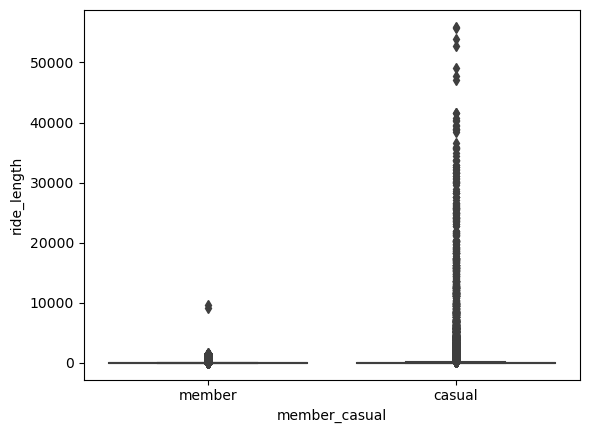

In [15]:
# Boxplot of column "ride_length" to see the distribution of data between annual member and casual rider

sns.boxplot(data = df, x = 'member_casual', y = 'ride_length', order = ['member', 'casual'])

It shows that casual riders use bikes for more duration than members

In [16]:
# Convrting datatypes of columns "ride_id", "rideable_type" and "member_casual"

df = df.astype({'ride_id' : 'string', 'rideable_type' : 'category', 'member_casual' : 'category'})


In [17]:
df.dtypes

ride_id                  string
rideable_type          category
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual          category
ride_length               int32
dtype: object

In [18]:
# Checking the number of rows and columns

df.shape

(5055416, 6)

In [19]:
# Checking there are missing values in the dataframe "df"

df.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
dtype: int64

In [20]:
# Removing leading and trailing spaces in the column "ride_id"

df['ride_id'] = df['ride_id'].str.strip()

In [21]:
# Checking if there are duplicate rows

df[df['ride_id'].duplicated()]

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length


# Analyzing and Share

In [22]:
# Creating columns "year", "month", "day_of_week", "hour" and converting datatpes

df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour


In [23]:
df['year'] = df['year'].astype('int16')
df['hour'] = df['hour'].astype('int8')

In [24]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,day_of_week,hour
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17,2020,October,Saturday,19
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14,2020,October,Saturday,23
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8,2020,October,Saturday,23
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2,2020,October,Saturday,22
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16,2020,October,Saturday,19


In [25]:
df.sort_values(by = 'year')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,day_of_week,hour
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17,2020,October,Saturday,19
509711,4DF9DA2BC55C3095,electric_bike,2020-11-08 13:43:25,2020-11-08 14:26:31,member,43,2020,November,Sunday,13
509712,5C70AB4451DD7306,electric_bike,2020-11-05 18:15:17,2020-11-05 18:26:10,member,10,2020,November,Thursday,18
509713,FDD25A0901AAD2EA,electric_bike,2020-11-19 20:40:55,2020-11-19 20:50:46,member,9,2020,November,Thursday,20
509714,34110632B3652193,docked_bike,2020-11-05 14:45:18,2020-11-05 14:54:54,member,9,2020,November,Thursday,14
...,...,...,...,...,...,...,...,...,...,...
2194861,95DC7E5BA7539225,electric_bike,2021-06-05 16:06:37,2021-06-05 16:24:28,casual,17,2021,June,Saturday,16
2194862,83705A553CA2EF64,classic_bike,2021-06-03 13:07:55,2021-06-03 14:20:50,casual,72,2021,June,Thursday,13
2194863,6753E521E7F25244,classic_bike,2021-06-03 18:38:13,2021-06-03 19:08:37,casual,30,2021,June,Thursday,18
2194865,6AC3B3FA5404C0E1,classic_bike,2021-06-27 19:26:52,2021-06-27 19:29:38,casual,2,2021,June,Sunday,19


### 1. Analyzing the difference in the number of rides between annual members and casual riders.

#### 1.1 Total number of rides in one year.

In [26]:
pd.pivot_table(df, index = 'member_casual', 
              values = 'ride_id', aggfunc = ['count'], 
              margins = True)

,count
,ride_id
member_casual,
casual,2325255
member,2730161
All,5055416


In [27]:
figure_1 = df.groupby('member_casual', as_index=False).count()

px.bar(figure_1, y = 'member_casual', 
        x = 'ride_id', 
      color = 'member_casual', height = 300, 
       text = 'ride_id', 
       labels = {'ride_id' : 'No. of Rides', 'member_casual' : 'Member/Casual'}, 
       hover_name = 'member_casual', 
       hover_data = {'member_casual' : False, 
                     'month' : False, 
                     'ride_id' : True}, 
       color_discrete_map = {'casual' : '#FF934F', 
                             'member' : '#058ED9'})

#### 1.2 Number of rides in each Month

In [28]:
pv1 = pd.pivot_table(df, index = ['year', 'month', 'member_casual'], 
                    values = 'ride_id', 
                    aggfunc = ['count'], 
                    margins = True)

pv1 = pv1.loc[(pv1 != 0).any(axis=1)]
pv1

count
                              ride_id
year month     member_casual         
2020 December  casual           29665
               member           99832
     November  casual           86730
               member          168432
     October   casual          141922
               member          237996
2021 April     casual          134945
               member          197477
     August    casual          407517
               member          385426
     February  casual            9964
               member           38685
     January   casual           17842
               member           77573
     July      casual          435927
               member          373833
     June      casual          365023
               member          352676
     March     casual           83148
               member          142375
     May       casual          253346
               member          269897
     September casual          359226
               member          385959
All                           5055416

In [29]:
figure_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
figure_2 = figure_2[figure_2['ride_id'] != 0]

px.line(figure_2, x = 'month', y = 'ride_id', 
       range_y = [0,450000], 
       color = 'member_casual', 
       line_shape = 'spline', 
       markers=True, 
       labels = {'ride_id' : 'No. of rides',
                 'month' : 'months (Oct 2020 - Sep 2021)', 
                 'member_casual' : 'Member/Casual'}, 
       hover_name = 'member_casual', 
       hover_data = {'member_casual' : False, 
                     'month' : True, 
                     'ride_id' : True}, 
       color_discrete_map = {'casual' : '#FF934F', 'member' : '#058ED9'})

#### . Number of rides rises in summer season and falls during winter season
#### . Casual riders and annual members behave the same way as the seasons changes
#### . Casual riders overtake members during summer

### 1.3 Average Number of rides in each weekday

In [30]:
pd.pivot_table(df, 
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id', 
              aggfunc = ['count'], 
              margins = True)

count
                           ride_id
day_of_week member_casual         
Friday      casual          334363
            member          398689
Monday      casual          262801
            member          369604
Saturday    casual          516709
            member          392655
Sunday      casual          438983
            member          338729
Thursday    casual          270844
            member          413808
Tuesday     casual          247964
            member          400504
Wednesday   casual          253591
            member          416172
All                        5055416

In [31]:
figure_3 = df.groupby(['day_of_week', 'member_casual'], 
                      as_index=False).count()

px.line(figure_3, x = 'day_of_week', y = 'ride_id', 
       range_y = [0,550000], 
       color = 'member_casual', 
       line_shape = 'spline', 
       markers=True, 
       labels = {'ride_id' : 'No. of Rides', 'day_of_week' : 'weekdays', 'member_casual' : 'Member/Casual'}, 
       hover_name = 'member_casual', 
       hover_data = {'member_casual' : False, 
                     'month' : False, 
                     'ride_id' : True}, 
       color_discrete_map = {'casual' : '#FF934F', 
                             'member' : '#058ED9'})

#### . More casual riders use bike share on Saturday and Sunday
#### . There are fixed number of casual riders using on weekdays
#### . Number of annual members riding seems to be the same everyday

# Average number of rides in each hour

In [32]:
pd.pivot_table(df, 
               index = ['hour', 'member_casual'], 
               values = 'ride_id', 
               aggfunc = ['count'], 
               margins = True)

count
                    ride_id
hour member_casual         
0    casual           47827
     member           27119
1    casual           34357
     member           17594
2    casual           21917
     member           10024
3    casual           12154
     member            5740
4    casual            8646
     member            6904
5    casual           10705
     member           25904
6    casual           22642
     member           74074
7    casual           40284
     member          131985
8    casual           55570
     member          147646
9    casual           67683
     member          114296
10   casual           94645
     member          114944
11   casual          124632
     member          140341
12   casual          151021
     member          164354
13   casual          162151
     member          161708
14   casual          168013
     member          160614
15   casual          176694
     member          182284
16   casual          192608
     member          232365
17   casual          221084
     member          288402
18   casual          198252
     member          245191
19   casual          153242
     member          174298
20   casual          112847
     member          115596
21   casual           94234
     member           82733
22   casual           87153
     member           62817
23   casual           66894
     member           43228
All                 5055416

In [33]:
figure_4 = df.groupby(['hour', 'member_casual'], 
                      as_index=False).count()

figure_4a = px.line(figure_4, x = 'hour', y = 'ride_id', 
                    range_x = [0,23], 
                    range_y = [0,300000], 
                   color = 'member_casual', 
                   line_shape = 'spline', 
                   markers = True, 
                   labels = {'ride_id' : 'No. of Rides', 
                             'hour' : '24 hours', 
                             'member_casual' : 'Member/casual'}, 
                   hover_name = 'member_casual', 
                   hover_data = {'member_casual' : False,
                                 'month' : False, 
                                 'ride_id' : True},
                   color_discrete_map = {
                       'casual' : '#FF934F', 
                       'member' : '#058ED9'
                   })

figure_4a.update_xaxes(dtick=1)
figure_4a.show()

#### . Both casual riders and members use bike share more in the afternoos
#### . In the morning the casual riders are less than members

# 2. Analyzing the difference in average ride length between casual riders and annual members

### Average ride length in 1 year

In [34]:
pd.pivot_table(df, 
               index = 'member_casual', 
               values = 'ride_length', 
               aggfunc = ['mean'], 
              margins = True)

,mean
,ride_length
member_casual,
casual,32.798758
member,13.905262
All,22.595387


In [35]:
figure_4 = round(df.groupby('member_casual',
                            as_index=False).mean(),2)

px.bar(figure_4, 
       x = 'ride_length', 
       y = 'member_casual', 
       range_x = [0,35], 
      color = 'member_casual', 
      height = 300, 
      text = 'ride_length', 
      labels = {'ride_length' : 'Average ride length (minutes)', 
                'member_casual' : 'Member/Casual'},
      hover_name = 'member_casual', 
      hover_data = {'member_casual' : False, 
                    'ride_length' : True}, 
      color_discrete_map = {'casual' : '#FF934F', 
                            'member' : '#058ED9'})

C:\Users\MAGOMA\AppData\Local\Temp\ipykernel_17420\818416594.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#### Average ride length in each month

In [36]:
pd.pivot_table(df, 
               index = ['year', 'month', 'member_casual'], 
               values = ['ride_length'], 
               aggfunc = ['mean'], 
              margins = True)

mean
                             ride_length
year month     member_casual            
2020 December  casual          26.653733
               member          12.421138
     November  casual          31.756532
               member          13.294522
     October   casual          30.314469
               member          13.800984
2021 April     casual          37.993864
               member          14.425999
     August    casual          28.654314
               member          13.832834
     February  casual          49.699117
               member          17.898255
     January   casual          25.582222
               member          12.565016
     July      casual          32.753615
               member          13.989878
     June      casual          37.199996
               member          14.439262
     March     casual          38.069527
               member          13.677619
     May       casual          38.273622
               member          14.402698
     September casual          27.680354
               member          13.461233
All                            22.595387

In [37]:
figure_5 = round(df.groupby(['year', 'month', 'member_casual'], 
                           as_index=False).mean(),2).dropna()

px.bar(figure_5, 
       x = 'month', 
      y = 'ride_length', 
      color = 'member_casual', 
      barmode = 'group', 
      text = 'ride_length', 
      labels = {'ride_length' : 'Average Ride Length (minutes)', 'member_casual' : 'Member/Casual', 'month' : 'Months (Oct 2020 - Sep 2021)'},
      hover_name = 'member_casual', 
      hover_data = {'member_casual' : False, 
                    'ride_length' : True}, 
      color_discrete_map = {
          'casual' : '#FF934F', 
          'member' : '#058ED9'
      })

C:\Users\MAGOMA\AppData\Local\Temp\ipykernel_17420\2820746223.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



##### . Average ride lengths of casual riders are more than twice in each and every month.


# Average ride length in each weekday

In [38]:
pd.pivot_table(df,
               index = ['day_of_week', 'member_casual'], 
               values = ['ride_length'],
               aggfunc = ['mean'], 
               margins = True)

mean
                          ride_length
day_of_week member_casual            
Friday      casual          31.341069
            member          13.751343
Monday      casual          32.503232
            member          13.404352
Saturday    casual          35.559346
            member          15.524239
Sunday      casual          38.090758
            member          15.846101
Thursday    casual          28.280346
            member          13.008564
Tuesday     casual          29.244382
            member          13.040172
Wednesday   casual          28.542630
            member          13.114532
All                         22.595387

In [ ]:
figure_6 = df.groupby('member_casual').mean()

figure_6.plot(kind='bar')

#### . Both members and casual riders use for long rides on weekends
#### . Casual riders rides longer than members in all weekdays

# Analyzing difference in rideable type usage between members and casual riders

In [40]:
pd.pivot_table(df, 
              index =['rideable_type', 'member_casual'], 
              values = ['ride_id'], 
              aggfunc = ['count'], 
              margins = True)

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1108713
              member         1606390
docked_bike   casual          404106
              member          263630
electric_bike casual          812436
              member          860141
All                          5055416

In [41]:
figure_7 = df.groupby(['rideable_type', 'member_casual'], 
                     as_index=False).count()

px.bar(figure_7, 
      x = 'rideable_type', 
      y = 'ride_id', 
      color = 'member_casual', 
      text = 'ride_id', 
      labels = {'ride_id' : 'No. of Rides', 
               'member_casual' : 'Member/Casual', 
               'rideable_type' : 'Rideable Type'}, 
      hover_name = 'member_casual', 
      hover_data = {'member_casual' : False, 
                   'ride_length' : False}, 
      color_discrete_map = {'member' : '#058ED9', 
                           'casual' : '#FF934F'})

# Act

## Conclusion

#### . Annual members and casual riders use Cyclistic bike share differently.
#### . Annual members use bike share for daily commuting and casual riders use bike share mostly during the weekends.
#### . There are fixed number of casual riders who use bike share for commuting.

# Recommendations

#### . Create a program where casual riders with high poins must be given discounts
#### . Create an Annual membership package for weekend usage, to attract weekend casual riders
#### . Promotions that include the finacial saving of taking membership when compared singles passes and full day passes for a period of a year must be implemented